In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/spam.csv")

In [ ]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
print(data.isnull().sum())

Category    0
Message     0
dtype: int64


In [ ]:
data.Category.unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
data["Category"] = data["Category"].map({"ham":1, "spam":0})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int64 
 1   Message   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data['length'] = data['Message'].apply(len)
data.head()

,Category,Message,length
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
emails= data["Message"]
labels = data["Category"]

In [ ]:
import re
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9 ]", "", text)
    text = nltk.word_tokenize(text)
    return text

In [ ]:
emails = emails.apply(preprocess_text)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words ='english')
emails = list(map(str, emails))
features = vectorizer.fit_transform(emails)

In [ ]:
features

<5572x9269 sparse matrix of type '<class 'numpy.int64'>'
	with 43134 stored elements in Compressed Sparse Row format>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int64 
 1   Message   5572 non-null   object
 2   length    5572 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 130.7+ KB


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,data.Category,test_size=0.25)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression().fit(x_train,y_train)

In [ ]:
lr.coef_

array([[-0.0125266 , -0.02258331, -0.5013161 , ...,  0.        ,
        -0.32758588,  0.01201794]])

In [ ]:
lr.intercept_

array([3.80022913])

In [ ]:
ypred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_test,ypred)

0.9798994974874372

In [ ]:
print(confusion_matrix(y_test, ypred))

[[ 153   28]
 [   0 1212]]


In [ ]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       181
           1       0.98      1.00      0.99      1212

    accuracy                           0.98      1393
   macro avg       0.99      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC().fit(x_train, y_train)

In [ ]:
svc_pred = svc.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
accuracy_score(y_test,svc_pred)

0.9734386216798278

In [ ]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       181
           1       0.97      1.00      0.98      1212

    accuracy                           0.97      1393
   macro avg       0.99      0.90      0.94      1393
weighted avg       0.97      0.97      0.97      1393



In [ ]:
print(confusion_matrix(y_test, svc_pred))

[[ 144   37]
 [   0 1212]]


#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB().fit(x_train.toarray(), y_train)

In [ ]:
nb_pred = nb.predict(x_test.toarray())

In [ ]:
accuracy_score(y_test,nb_pred)

0.8793969849246231

In [ ]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.52      0.89      0.66       181
           1       0.98      0.88      0.93      1212

    accuracy                           0.88      1393
   macro avg       0.75      0.88      0.79      1393
weighted avg       0.92      0.88      0.89      1393



In [ ]:
print(confusion_matrix(y_test, nb_pred))

[[ 161   20]
 [ 148 1064]]


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.9372529644268774, 0.9943820224719101, 'x[8445] <= 0.5\ngini = 0.234\nsamples = 4179\nvalue = [566, 3613]'),
 Text(0.8903162055335968, 0.9831460674157303, 'x[2181] <= 0.5\ngini = 0.203\nsamples = 4070\nvalue = [467, 3603]'),
 Text(0.8824110671936759, 0.9719101123595506, 'x[5424] <= 0.5\ngini = 0.178\nsamples = 3998\nvalue = [395, 3603]'),
 Text(0.8359683794466403, 0.9606741573033708, 'x[7190] <= 0.5\ngini = 0.158\nsamples = 3935\nvalue = [341, 3594]'),
 Text(0.782608695652174, 0.949438202247191, 'x[3506] <= 0.5\ngini = 0.146\nsamples = 3899\nvalue = [308, 3591]'),
 Text(0.7351778656126482, 0.9382022471910112, 'x[6821] <= 0.5\ngini = 0.125\nsamples = 3804\nvalue = [255, 3549]'),
 Text(0.7075098814229249, 0.9269662921348315, 'x[8570] <= 0.5\ngini = 0.109\nsamples = 3740\nvalue = [217, 3523]'),
 Text(0.6996047430830039, 0.9157303370786517, 'x[6482] <= 0.5\ngini = 0.101\nsamples = 3722\nvalue = [199, 3523]'),
 Text(0.691699604743083, 0.9044943820224719, 'x[6295] <= 0.5\ngini = 0.096

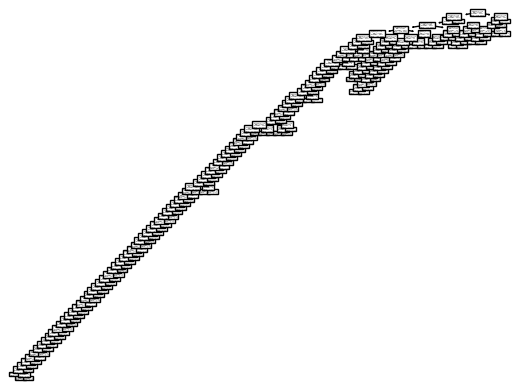

In [ ]:
from sklearn.tree import plot_tree
plot_tree(dtc)

In [ ]:
dtc_pred = dtc.predict(x_test)

In [ ]:
accuracy_score(y_test,dtc_pred)

0.9605168700646087

In [ ]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       181
           1       0.97      0.99      0.98      1212

    accuracy                           0.96      1393
   macro avg       0.93      0.89      0.91      1393
weighted avg       0.96      0.96      0.96      1393



In [ ]:
print(confusion_matrix(y_test, dtc_pred))

[[ 143   38]
 [  17 1195]]


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier().fit(x_train, y_train)

In [ ]:
rfc_pred = rfc.predict(x_test)

In [ ]:
accuracy_score(y_test,rfc_pred)

0.9691313711414213

In [ ]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      0.76      0.87       181
           1       0.97      1.00      0.98      1212

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.97      1393



In [ ]:
print(confusion_matrix(y_test, rfc_pred))

[[ 138   43]
 [   0 1212]]


# Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
etc = ExtraTreesClassifier().fit(x_train, y_train)
etc_pred = etc.predict(x_test)
print(classification_report(y_test, etc_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       181
           1       0.97      1.00      0.98      1212

    accuracy                           0.97      1393
   macro avg       0.97      0.90      0.93      1393
weighted avg       0.97      0.97      0.97      1393



In [ ]:
accuracy_score(y_test,etc_pred)

0.9712849964106246

In [ ]:
print(confusion_matrix(y_test, etc_pred))

[[ 147   34]
 [   6 1206]]


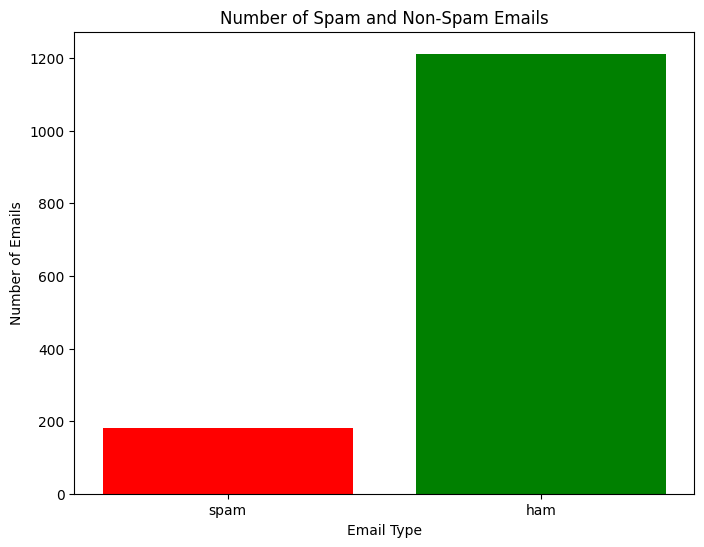

In [ ]:
import matplotlib.pyplot as plt
spam_counts = y_test.value_counts()
plt.figure(figsize=(8, 6))
plt.bar(spam_counts.index, spam_counts.values, color=['green', 'red'])
plt.xlabel('Email Type')
plt.ylabel('Number of Emails')
plt.title('Number of Spam and Non-Spam Emails')
plt.xticks([0, 1], ['spam', 'ham'])
plt.show()

**LOGISTIC REGRESSION**:

ACCURACY SCORE:0.9856424982053122


**SVM:**

ACCURACY SCORE:0.9755922469490309

**RANDOM FOREST:**

ACCURACY SCORE:0.9741564967695621

**DECISION TREE:**

ACCURACY SCORE:0.9691313711414213

**NAIVE BAYES:**

ACCURACY SCORE:0.8650394831299354

**EXTRA TREE CLASSIFIER**:


ACCURACY SCORE:0.9784637473079684

**Conclusion:**
The classification model Logistic Regression is having highest accuracy